**Sourcecode**

Kelompok Srikandi (8B)
Nama Anggota:
-

1.   Callista Levina Dotulong
2.   Dwi Nur Indah Sari
3.   Latifa Nur Safitri
4.   Lisa Rohmatul Ullah
5.   Meita Palupi Fitria
6.   Sabrina Nur Halisa
- Dataset:
> E_Commerce_Dataset.csv
- Objective:
> Dapat mengefisienkan cost yang dikeluarkan oleh e-commerce untuk customer churn
- Goals:
> E- commerce mampu mengefisiensikan pengeluaran cost bagi customer churn menjadi lebih hemat sekitar 40%.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

**Import Library**

In [ ]:
import pandas as pd # mengelola dataset
import numpy as np #numerical computation

# library Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

**Import Dataset**

In [ ]:
df = pd.read_csv("E_Commerce_Dataset.csv")
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2160,52161,0,NaN,Phone,1,6.0,Cash on Delivery,Female,3.0,4,Mobile,4,Single,2,1,11.0,1.0,2.0,2.0,121
4073,54074,0,10.0,Computer,1,16.0,Debit Card,Male,4.0,2,Mobile Phone,4,Married,3,0,23.0,2.0,2.0,3.0,153
414,50415,0,23.0,Phone,3,14.0,E wallet,Male,2.0,3,Mobile Phone,4,Divorced,8,0,15.0,1.0,2.0,2.0,139
4213,54214,0,9.0,Computer,1,18.0,Credit Card,Male,4.0,5,Fashion,5,Married,4,1,14.0,2.0,3.0,NaN,224
4614,54615,0,3.0,Mobile Phone,1,26.0,COD,Male,3.0,4,Laptop & Accessory,1,Married,6,0,13.0,2.0,2.0,3.0,168


## **EDA**

###  Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
# Mengecek data kosong dalam DataFrame
kolom_kosong = df.columns[df.isna().any()].tolist()

if len(kolom_kosong) > 0:
    print("Ya, ada kolom dengan nilai kosong. Kolom-kolom tersebut adalah:")
    for kolom in kolom_kosong:
        print(kolom)
else:
    print("Tidak ada kolom dengan nilai kosong dalam DataFrame.")

Ya, ada kolom dengan nilai kosong. Kolom-kolom tersebut adalah:
Tenure
WarehouseToHome
HourSpendOnApp
OrderAmountHikeFromlastYear
CouponUsed
OrderCount
DaySinceLastOrder


**Statistical Summary 1**

In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.217940
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193878
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


berdasarkan hasil output dataset tampak tidak ada nilai summary yang secara langsung aneh atau tidak mungkin dalam data tersebut.

**Statistical Summary 2**

In [ ]:
df.describe(include = 'object')

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


Dari statistical summary diatas dapat disimpulkan bahwa tidak terdapat missing value pada data yang bertipe kategori

### Univariate Analysis

In [ ]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

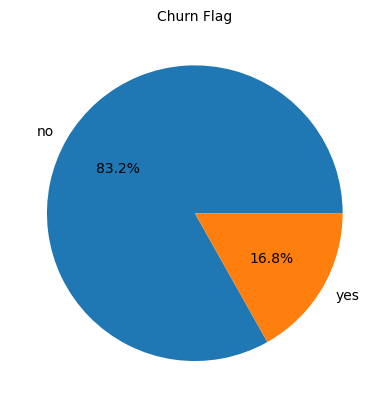

In [ ]:
labels = ("no", "yes")
sizes = df['Churn'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Churn Flag", fontsize=10)
plt.show()

Hasil Observasi:

Presentase churn pada grafik menggambarkan perbandingan relatif antara dua kategori dalam dataset, di mana kategori utama adalah apakah pelanggan tetap berlangganan atau berhenti berlangganan. dan distribusis datanya normal.

**Categorical Column**

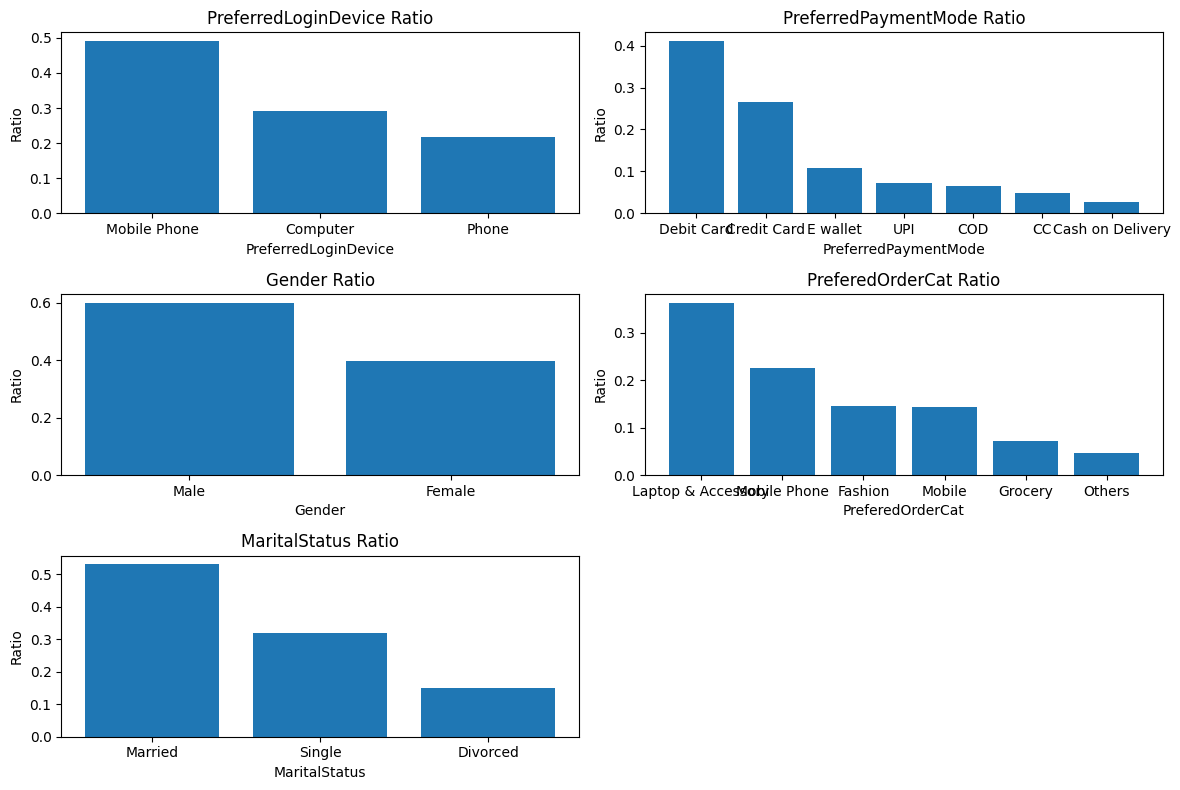

In [ ]:
# Mengidentifikasi kolom yang bertipe objek (kategori)
object_columns = df.select_dtypes(include=['object']).columns

# Menentukan ukuran subplot dan jumlah baris dan kolom
n = len(object_columns)
rows = (n + 1) // 2
cols = 2

# Membuat subplot
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Melakukan loop melalui kolom yang bertipe objek
for i, column in enumerate(object_columns):
    row = i // cols
    col = i % cols
    column_counts = df[column].value_counts(normalize=True)

    axes[row, col].bar(column_counts.index, column_counts)
    axes[row, col].set_title(f"{column} Ratio")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Ratio')

# Menyusun subplot yang tidak terpakai
for i in range(n, rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

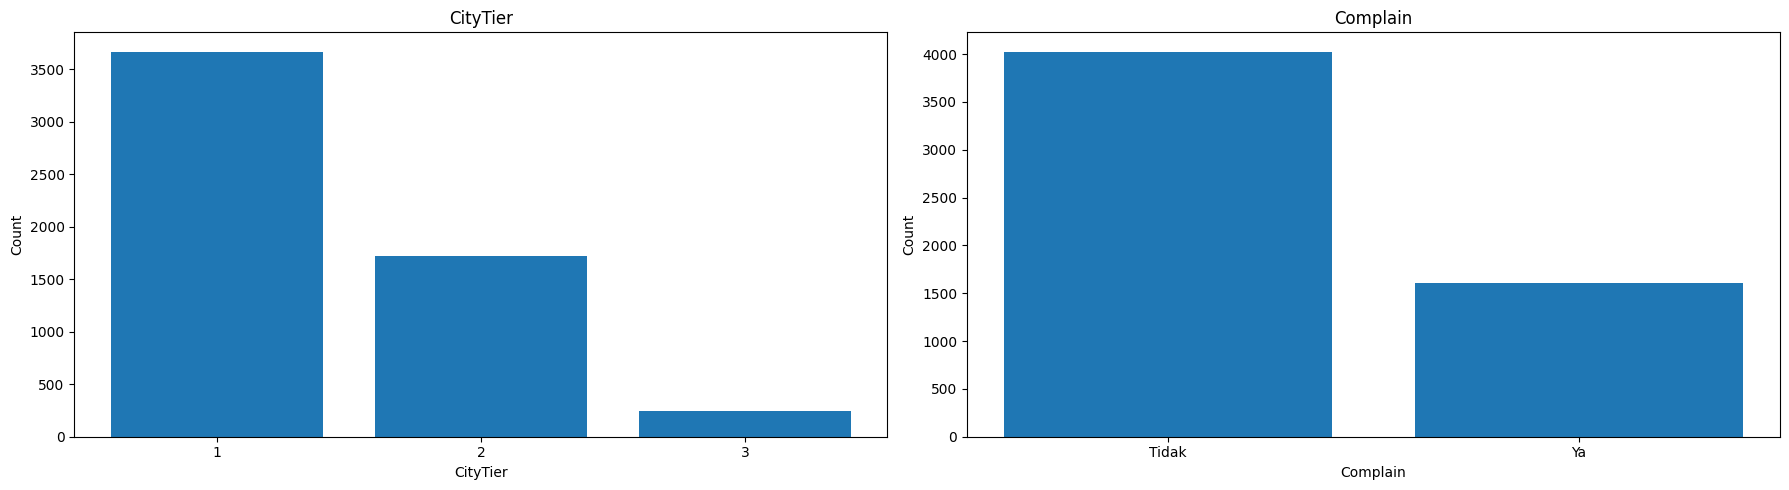

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plot CityTier
city_tier_counts = df['CityTier'].value_counts()
city_tier_names = ['1', '2', '3']
axes[0].bar(city_tier_names, city_tier_counts)
axes[0].set_title('CityTier')
axes[0].set_xlabel('CityTier')
axes[0].set_ylabel('Count')

# Plot Complain
complain_counts = df['Complain'].value_counts()
complain_names = ['Tidak', 'Ya']
axes[1].bar(complain_names, complain_counts)
axes[1].set_title('Complain')
axes[1].set_xlabel('Complain')
axes[1].set_ylabel('Count')

# Menyusun subplot
plt.tight_layout()
plt.show()

Hasil Observasi:

- PreferredLoginDevice : Device yang paling sering digunakan untuk melakukan login oleh customer adalah MObile Phone yang memiliki rasio paling besar dibandingkan 2 kategori yang lain sehingga Mobile Phone mendominasi chart.
- PreferredPaymentMode: Debit card dan Credit Card merupakan metode pembayaran yang paling diminati customer berdasarkan data dalam datset melihat 2 kategori tersebut memiliki perbedaan yang cukup signifikan dari kategori lainnya.
- PreferedOrderCat: Laptop & Accessory merupakan nilai yang mendominasi dalam variable Order Cat denga jumlah ratio paling tinggi berbanding dengan nilai-nilai lainnya.
- Gender: Pada variable Gender dapat terlihat bahwa customer yang bergender male lebih banyak daripada yang bergender female. Hal ini dapat dibuktikan dari distribusi plot tersebut gender male lebih besar rasionya daripada female.
- MaritalStatus: Pada plot distribusi tersebut menunjukan bahwa customer yang berstatus menikah lebih mendominasi daripada yang berstatus single maupun cerai.
-CityTier:Dari plot tersebut terlihat Tier 1 memeiliki frekuensi paling tinggi daripada Tier 2 dan 3.menandakan Customer dari E-Commerce didominasi oleh customer-customer dari Kota di Tier 1
-Complain:Berdasarkan distribusi plot frekuensi jumlah customer yang tidak melakukan complain lebih banyak dari yang melakukan complain sehingga mendominasi variable complain.hal ini menandakan dalam rentang waktu sebagian besar tersebut customer memiliki pengalaman berbelanja yang cukup baik.

**Numerical Column**

*untuk melihat distribusi plot yang tebentuk*

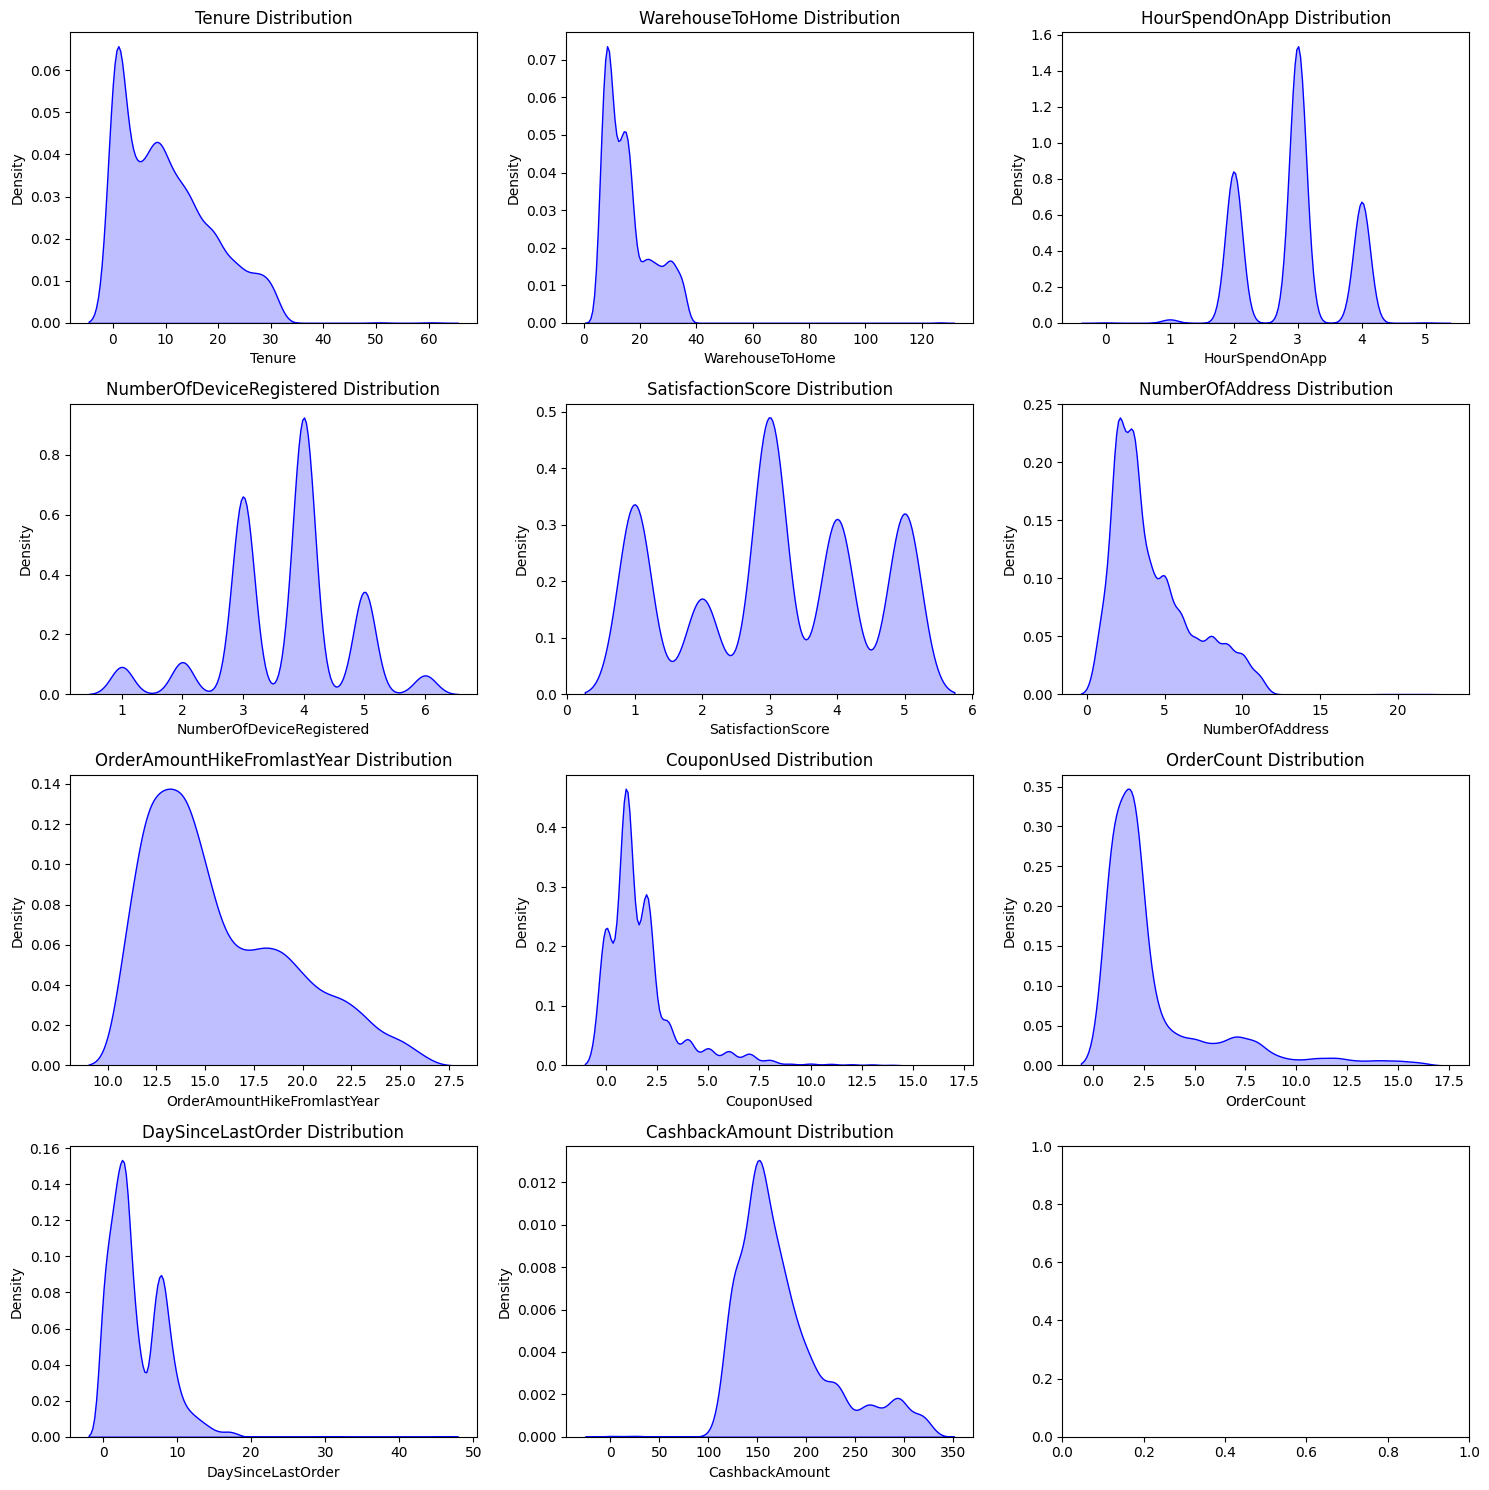

In [ ]:
import seaborn as sns

excluded_columns = ['Churn', 'CityTier', 'Complain', 'CustomerID']
numeric_columns = [col for col in df.select_dtypes(include=['int', 'float']).columns if col not in excluded_columns]

# Membuat subplot dalam satu gambar dengan 4 kolom dan 3 baris
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

# Loop melalui kolom yang bertipe numerik
for i, column in enumerate(numeric_columns):
    row = i // 3
    col = i % 3

    # Menambahkan KDE menggunakan seaborn
    sns.kdeplot(df[column], ax=axes[row, col], fill=True, color='blue')
    axes[row, col].set_title(f'{column} Distribution')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Density')

# Menyusun subplot
plt.tight_layout()
plt.show()


*Untuk melihat Outlier*

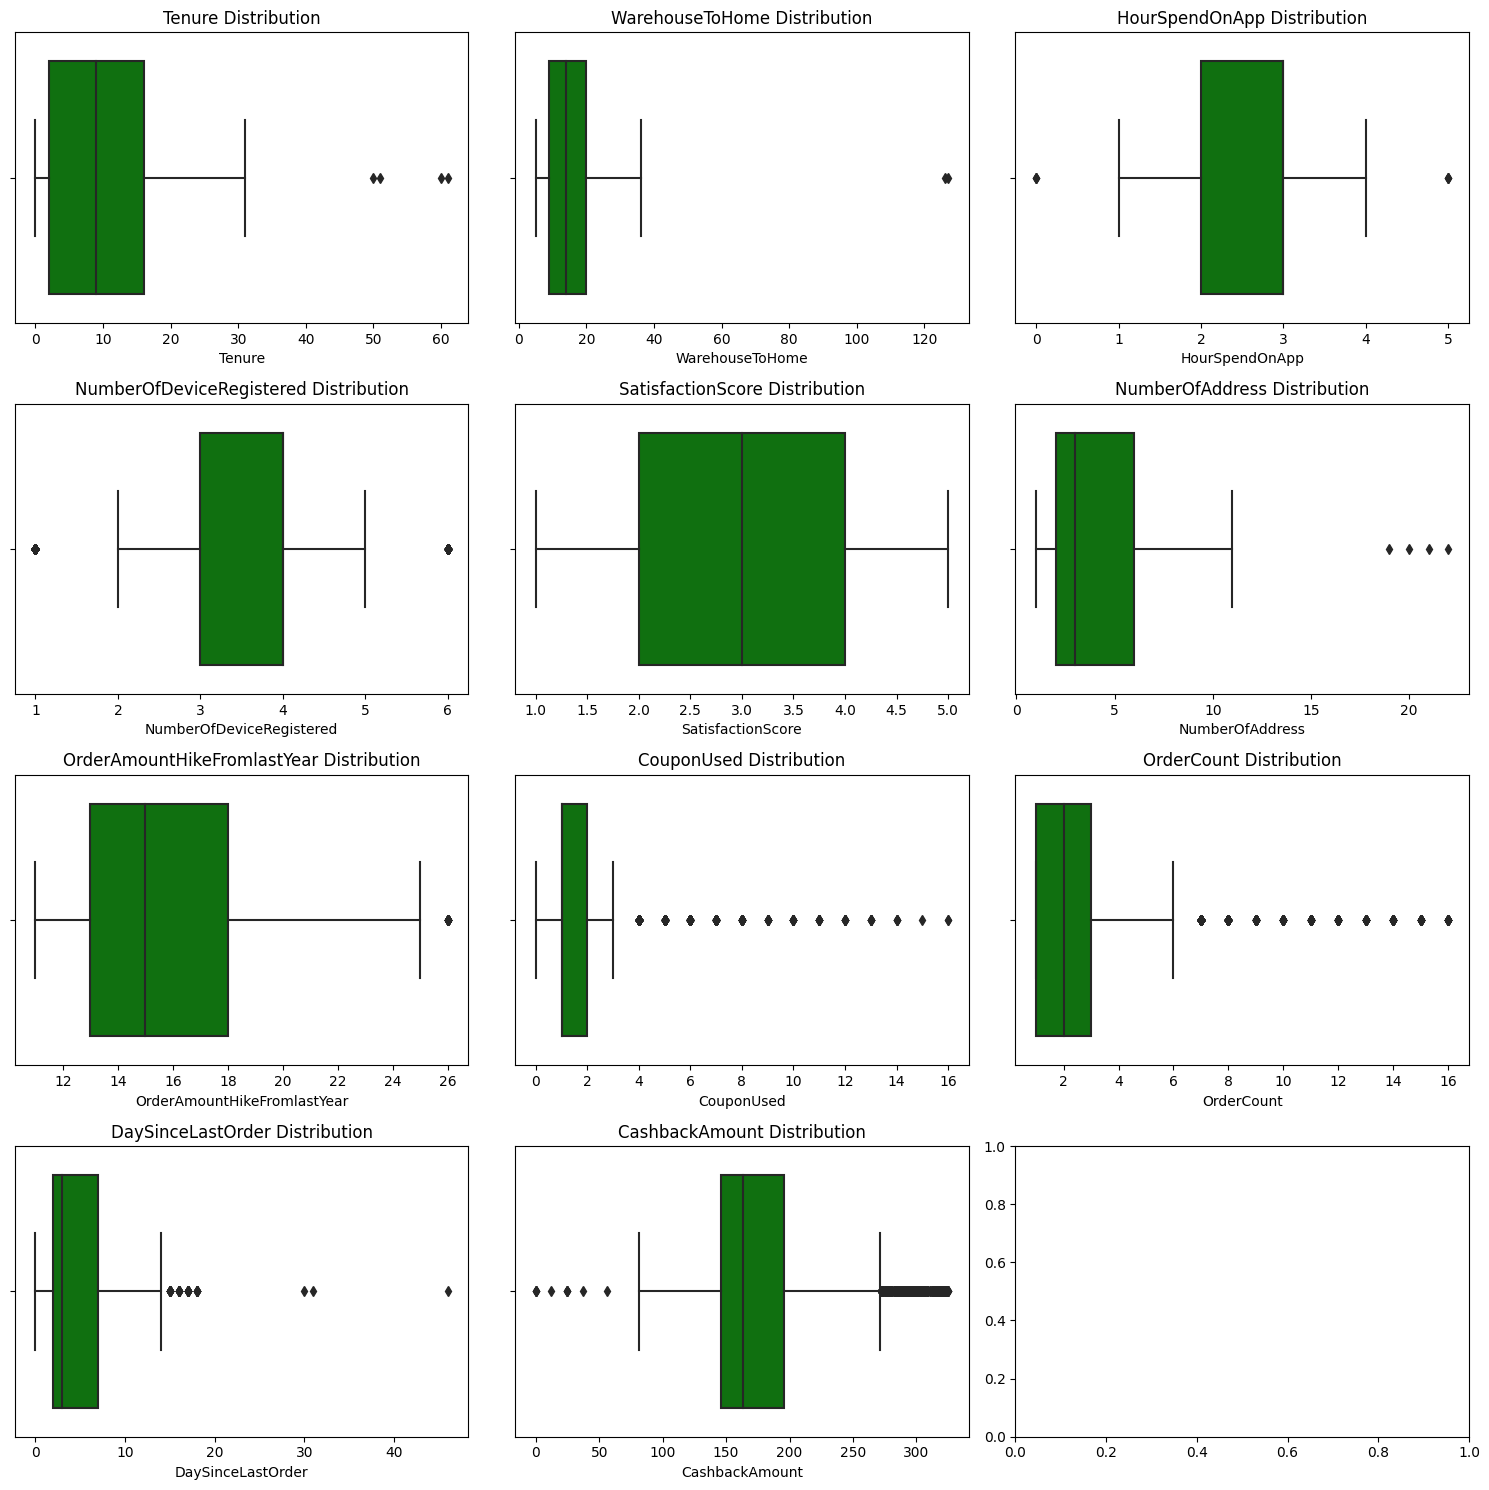

In [ ]:
import seaborn as sns

excluded_columns = ['Churn', 'CityTier', 'Complain', 'CustomerID']
numeric_columns = [col for col in df.select_dtypes(include=['int', 'float']).columns if col not in excluded_columns]

# Membuat subplot dalam satu gambar dengan 4 kolom dan 3 baris
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

# Loop melalui kolom yang bertipe numerik
for i, column in enumerate(numeric_columns):
    row = i // 3
    col = i % 3

    # Menambahkan boxplot menggunakan seaborn
    sns.boxplot(x=df[column], ax=axes[row, col], color='green')

    axes[row, col].set_title(f'{column} Distribution')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('')

# Menyusun subplot
plt.tight_layout()
plt.show()


Hasil Observasi:
- **Tenure** : Pada distribusi plot  variable Tenure terlihat bahwa grafik yang terbentuk berjenis positively skewed dengan terdapat banyak data outlier dan nilai kosong. sehingga diharapkan pada tahap data pre-processing hal ini dapat diatasi.
- **WarehouseToHome**: Distribusi plot tersebut menunjukan bahwa grafik  yang terbentuk berjenis positively skewed dengan data outlier dan juga nilai kosong dengan jarak tempuh yang mendominasi antara 0-20 KM.
- **HourSpendOnApp**: distribusi plot yang terbentuk adalah distribusi plot yang berjenis normal. Namun,didalam plot tersebut masih terdapat data outlier dan nilai kosong yang diharapkan pada tahap data pre-processing data dapat diatasi.
- **NumberOfDeviceRegistered**: distribusi plot tersebut menggambarkan jumlah device yang terdaftar atas customer tertentu pada plot tersebut dapat terlihat bahwa customer yang terdaftar mayoritas menggunakan 4 Device.
- **SatisfactionScore**: Mayoritas customer memiliki tingkat kepuasan pada kategori 4 melihat bahwa kategori 4 mendominasi chart dengan rasio tertinggi dan membentuk normal skew.
- **NumberOfAddress**: distribution plot tersebut menggambarkan jumlah addres yang digunakan per customernya untuk melakukan order dari data tersebut terdapat outlier yang menyebabkan ketimpangan pada data yang cukup signifikan sehingga membentuk positively skewed.
- **OrderAmountHikeFromlastYear**: Distribusi plot tersebut membetuk positively skewed terdapat outlier serta data kosong yang perlu diatasi di tahap berikutnya
- **CouponUsed**: Pada distribution plot tersebut dapat terlihat jelas bahwa kolom tersebut memiliki data outlier sehingga distribusi plot tersebut membetuk positively skewed, pada data -pre-processing di tahap selanjutnya diharapkan dapat mengatasi beberapa data kosong pada kolom Coupon Used.
- **OrderCount**: Dari distibusi plot tersebut dapat terlihat bahwa kategori pada plot tersebut cukup banyak serta memiliki outlier sehingga jenis skew yang terbentuk adalah positively skewed dan pada kolom OrderCount terdapat data kosong yang harus diatasi.
- **DaySinceLastOrder**: Distribusi yang terbentuk berjenis positively skewed namun dapat terlihat persebarannya membetuk grafik bimodal karena ada dua puncak atau kelompok data yang signifikan dalam distribusitersebut dan masih terdapat data kosong yang perlu diatasi pada tahap selanjutnya.
- **CashbackAmount**: Distribusi plot tersebut berjenis positively skewed terdapat dalam distribusi tersebut terlihat banyak data outlier sehinggap diharapkan hal ini dapat teratasi pada tahap data pre-processing

### Multivariate Analysis

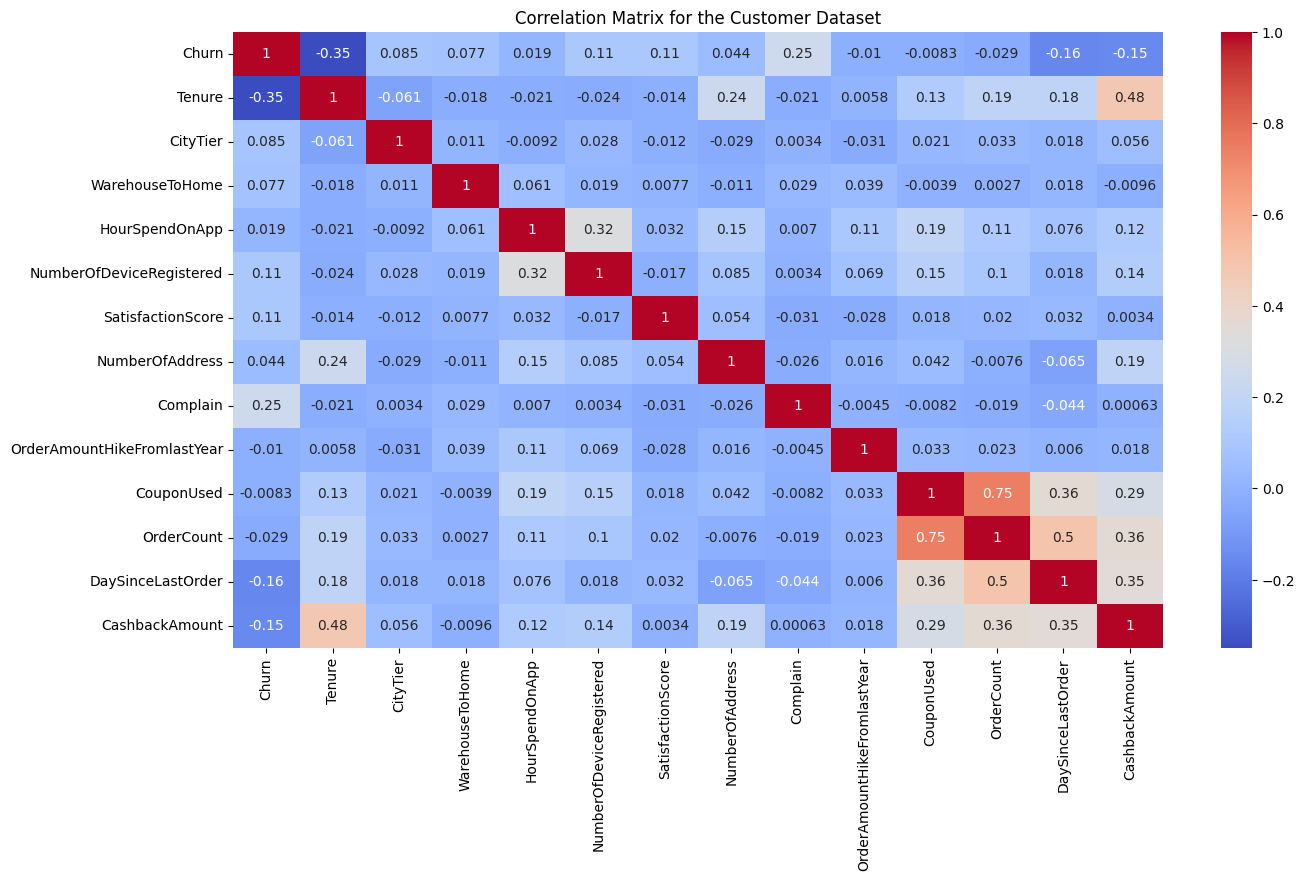

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghilangkan kolom 'CustomerID'
df_no_id = df.drop(['CustomerID'], axis=1)

# Membuat heatmap untuk matriks korelasi
plt.figure(figsize=(15, 8))
sns.heatmap(df_no_id.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for the Customer Dataset")
plt.show()


A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?

**Churn** :

- Terdapat beberapa variabel yang memiliki korelasi positif dengan Churn, seperti Complain (0.25), NumberOfAddress (0.04), dan HourSpendOnApp (0.11).
- Variabel seperti Tenure (-0.01), SatisfactionScore (0.11), dan WarehouseToHome (0.01) memiliki korelasi negatif yang lemah dengan Churn.

**HourSpendOnApp** (Jam yang Dihabiskan di Aplikasi):

- Korelasi positif yang cukup kuat dengan variabel lain seperti CouponUsed (0.19) dan NumberOfAddress (0.15).

**CouponUsed** (Penggunaan Kupon):

- Korelasi tinggi dengan OrderCount (0.75) dan DaySinceLastOrder (0.36).

**OrderCount** (Jumlah Pesanan):

Selain memiliki korelasi tinggi dengan CouponUsed, OrderCount juga memiliki korelasi positif yang cukup signifikan dengan DaySinceLastOrder (0.50) dan CashbackAmount (0.36).

**CashbackAmount** (Jumlah Cashback yang Diterima):

- Terkait secara positif dengan variabel HourSpendOnApp (0.12), NumberOfAddress (0.19), dan CouponUsed (0.29).

B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
- Korelasi seluruh feature, kecuali korelasi antara feature OrderCount dan CouponUsed, memiliki nilai di bawah 0,7 yang berarti feature-feature tersebut masih relevan dan dapat dipertahankan.
- Feature OrderCount dan CouponUsed memiliki nilai korelasi sebesar 0,75 yang berarti lebih besar dari nilai batas

### Business Insight

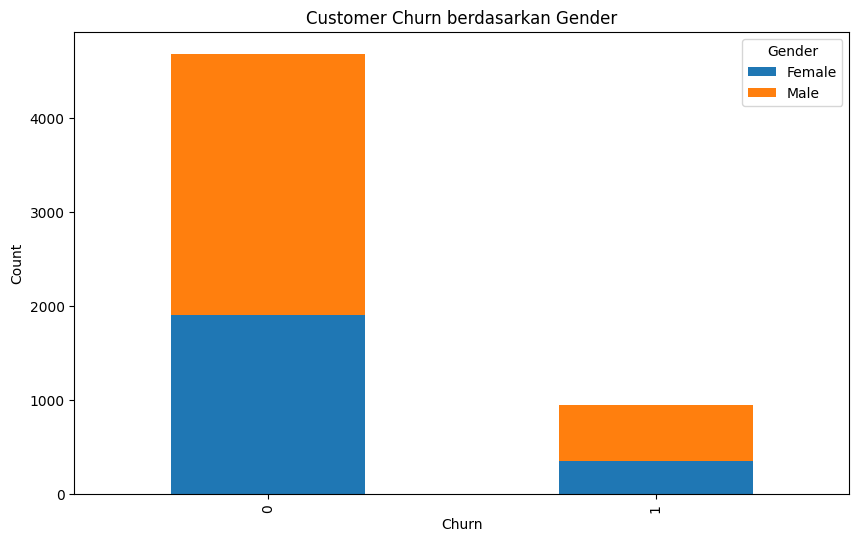

In [ ]:
# Menghitung frekuensi untuk plot stacked bar
stacked_data = df.groupby(['Churn', 'Gender']).size().unstack()

# Plot stacked bar
stacked_data.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(10, 6))

# Menambahkan judul dan label
plt.title('Customer Churn berdasarkan Gender')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.show()

Insight:
- Pelanggan Laki-laki Mengalami Churn yang Lebih Tinggi: Jumlah pelanggan laki-laki yang berhenti berlangganan (549) lebih tinggi daripada pelanggan perempuan (318). Ini menunjukkan bahwa laki-laki memiliki tingkat churn yang lebih tinggi dalam dataset ini.
- Pelanggan Laki-laki Lebih Banyak: Total pelanggan laki-laki (2668) juga lebih banyak daripada pelanggan perempuan (1831). Hal ini mungkin mengindikasikan bahwa laki-laki adalah kelompok yang lebih besar dalam populasi pelanggan.
> Hal ini menandakan bahwa E-commerce perlu Fokus pada Retensi Pelanggan Laki-laki: Karena jumlah pelanggan laki-laki yang berhenti berlangganan lebih tinggi, perusahaan mungkin perlu lebih memfokuskan upaya pada retensi pelanggan laki-laki. Ini bisa mencakup strategi promosi khusus, layanan pelanggan yang lebih baik, atau analisis lebih lanjut tentang alasan pelanggan laki-laki cenderung berhenti berlangganan.



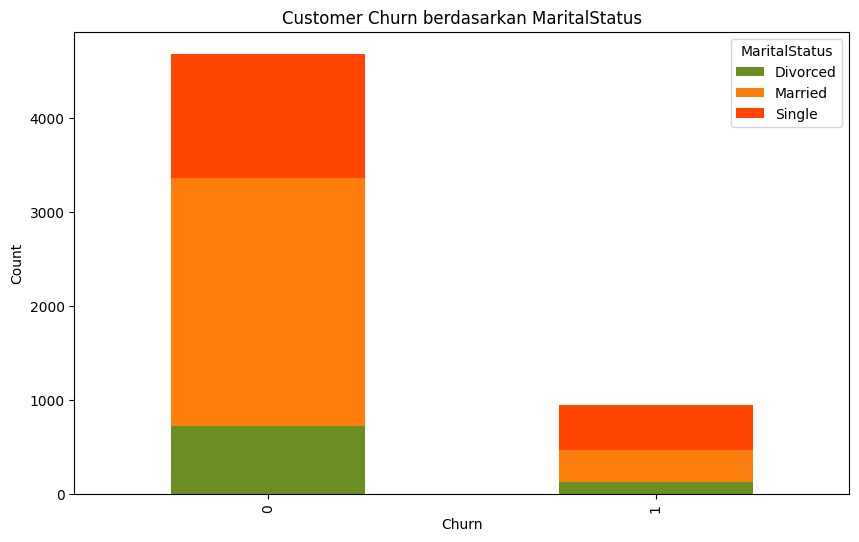

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Menghitung frekuensi untuk plot stacked bar
stacked_data = df.groupby(['Churn', 'MaritalStatus']).size().unstack()

# Plot stacked bar
stacked_data.plot(kind='bar', stacked=True, color=['#6B8E23', '#ff7f0e', '#FF4500'], figsize=(10, 6))

# Menambahkan judul dan label
plt.title('Customer Churn berdasarkan MaritalStatus')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.show()


- Terlihat bahwa pelanggan dengan status perkawinan Single cenderung memiliki tingkat churn yang lebih tinggi. Ini bisa mengindikasikan bahwa pelanggan lajang lebih rentan untuk berpindah dibandingkan dengan pelanggan yang sudah menikah dari total (1796) customer
- Status perkawinan Married tampaknya memiliki tingkat churn yang lebih rendah. Ini bisa menunjukkan bahwa pelanggan yang sudah menikah lebih stabil dalam hubungannya dengan perusahaan.
- Customer paling rendah churn berstatus divorce karena customer berstatus divorce berjumlah lebih sedikit(848) customer


> E-Commerce dapat lebih memperhatikan pelanggan yang berstatus lajang. Mungkin ada faktor-faktor khusus yang membuat pelanggan lajang lebih rentan terhadap churn. Dengan memahami lebih baik kebutuhan dan preferensi mereka, dapat mengembangkan strategi yang lebih khusus untuk mempertahankan mereka. E-Commerce dapat mempertimbangkan untuk mengembangkan penawaran atau program loyalitas khusus untuk pelanggan yang sudah menikah. Ini dapat memberikan insentif tambahan bagi mereka untuk tetap menggunakan layanan dan mungkin memperpanjang hubungan dengan perusahaan.


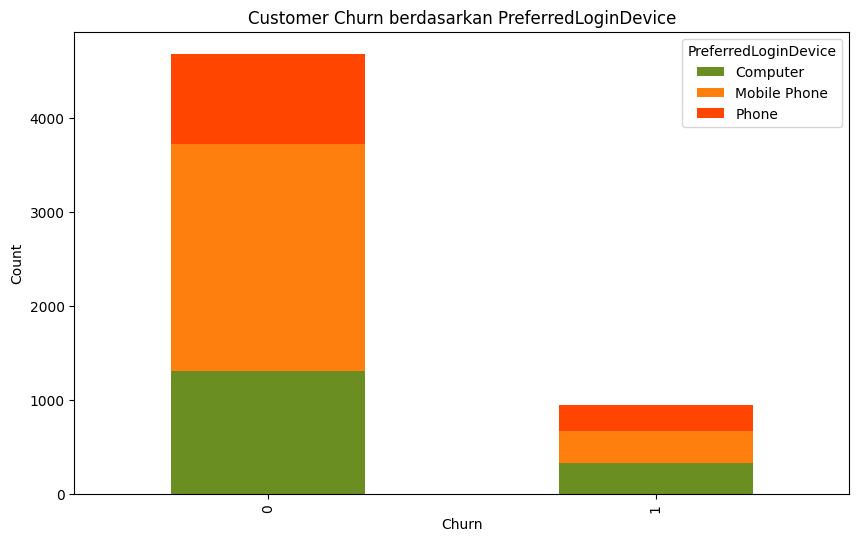

In [ ]:
# Menghitung frekuensi untuk plot stacked bar
stacked_data = df.groupby(['Churn', 'PreferredLoginDevice']).size().unstack()

# Plot stacked bar
stacked_data.plot(kind='bar', stacked=True, color=['#6B8E23', '#ff7f0e', '#FF4500'], figsize=(10, 6))

# Menambahkan judul dan label
plt.title('Customer Churn berdasarkan PreferredLoginDevice')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.show()


- Grafik menunjukkan bahwa mayoritas pelanggan memilih untuk login ke ecommerce dengan menggunakan device mobile phone atau telpon genggam dengan jumlah pelanggan lebih dari 2500 pengguna.
- Device computer menduduki peringkat kedua sebagai device yang paling banyak digunakan pelanggan ecommerce untuk login ke dalam ecommerce dengan jumlah pengguna lebih dari 1500 pengguna.
- Device phone merupakan device yang paling sedikit digunakan untuk login ke dalam ecommerce dengan jumlah pelanggan ecommerce sebanyak lebih dari 1000.

> Karena mayoritas pelanggan memilih untuk menggunakan perangkat mobile, pastikan bahwa situs web atau aplikasi e-commerce dioptimalkan dengan baik untuk penggunaan mobile. Pastikan tampilan responsif, kecepatan loading yang baik, dan navigasi yang mudah untuk perangkat mobile.

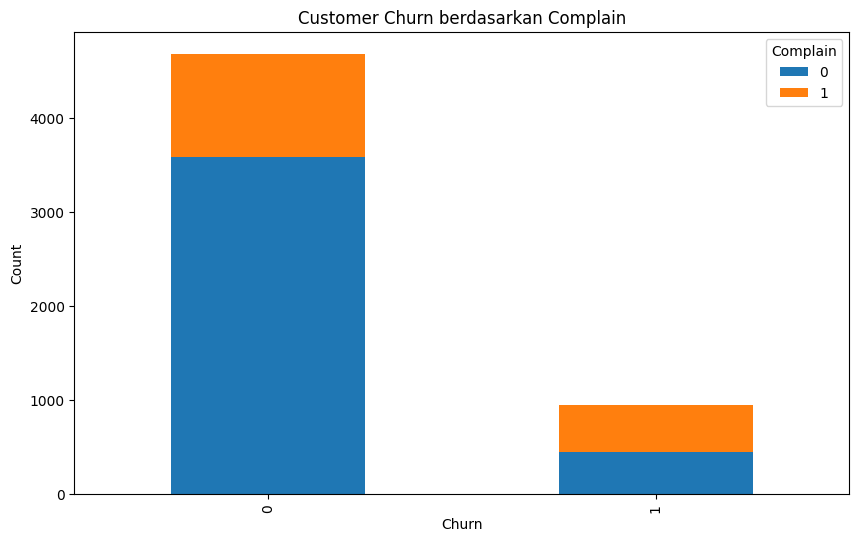

In [ ]:
# Menghitung frekuensi untuk plot stacked bar
stacked_data = df.groupby(['Churn', 'Complain']).size().unstack()

# Plot stacked bar
stacked_data.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(10, 6))

# Menambahkan judul dan label
plt.title('Customer Churn berdasarkan Complain')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.show()


- Data dalam grafik secara jelas mengindikasikan bahwa pelanggan yang pernah mengajukan komplain terkait dengan layanan cenderung memiliki risiko tinggi terhadap churn, dibandingkan dengan pelanggan yang belum pernah mengajukan komplain sebelumnya.

- Hal tersebut dapat dijadikan sebagai acuan oleh pengembang untuk meningkatkan kulitas dalam pelayanan dan penyelesaian masalah (complain) agar kesetiaan pelanggan terhadap layanan tetap terjaga.

## **Data Pre-processing**

### **1. Data Cleansing**

**Menggabungkan Beberapa value yang memiliki kesamaan**

In [ ]:
# Menggabungkan 'CC' dengan 'Credit Card'
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'CC': 'Credit Card'})
# Menggabungkan 'COD' dengan 'Cash on Delivery'
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'COD': 'Cash on Delivery'})

**A. Handle missing values**

In [ ]:
# Melakukan pengecekan apakah terdapat data kosong di dalam dataset
kolom_kosong = df.columns[df.isna().any()].tolist()
kolom_kosong

In [ ]:
# Menghitung median dari setiap kolom
median_values = df.median(numeric_only=True)

# Mengganti nilai-nilai yang hilang dengan median dari masing-masing kolom
df.fillna(median_values, inplace=True)

In [ ]:
#melakukan pemerksaan apakah terdapat kolom yang masih kosong
kolom_kosong = df.columns[df.isna().any()].tolist()
kolom_kosong

Setelah melakukan handling missing value lalu dilakukan pengecekan sudah tidak terdapat data yang kosong lagi, karena semua data yang kosong telah diisi menggunakan nilai median.

**B. Handle duplicated data**

In [ ]:
#melakukan pemeriksaan apabila terdapat data yang duplicate secara keseluruhan
df.duplicated().sum()

Dari hasil pengecekan tidak ditemukan data yang duplikat sehingga kita tidak perlu melakukan handling duplicated data

**C. Handling Outlier**

**Sebelum Handling Outlier**

In [ ]:
# Kolom yang ingin dikecualikan dari plot
excluded_columns = ['CustomerID', 'Churn', 'CityTier', 'Complain']

# Mengidentifikasi kolom numerik
numeric_columns = [col for col in df.select_dtypes(include=['int', 'float']).columns if col not in excluded_columns]

# Membuat subplot dalam satu gambar dengan 4 kolom dan 3 baris
fig, axes = plt.subplots(5, 3, figsize=(12, 8))

# Loop melalui kolom yang bertipe numerik
for i, column in enumerate(numeric_columns):
    row = i // 3
    col = i % 3



    # Membuat boxplot
    sns.boxplot(data=df, x=column, ax=axes[row, col])

# Mengatur layout
plt.tight_layout()
plt.show()


**Handling Using IQR**

In [ ]:
# Tentukan kolom yang ingin dihitung IQR-nya
columns_to_calculate_IQR = ['Tenure', 'NumberOfAddress', 'WarehouseToHome', 'CashbackAmount']

for column in columns_to_calculate_IQR:
    # Tentukan batas atas dan batas bawah untuk outlier
    lower_bound = df[column].quantile(0.25) - 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))
    upper_bound = df[column].quantile(0.75) + 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))

    # Filter data yang termasuk dalam outlier
    iqr_filtered = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Hitung IQR hanya untuk data yang termasuk dalam outlier
    Q1 = iqr_filtered[column].quantile(0.25)
    Q3 = iqr_filtered[column].quantile(0.75)
    IQR = Q3 - Q1

    # Lakukan sesuatu dengan IQR, misalnya mencetaknya
    print(f'{column} IQR for included data: {IQR}')

**Setelah Handling Outlier**

In [ ]:
# Membuat subplot dalam satu gambar dengan 2 kolom dan 2 baris
fig, axes = plt.subplots(2, 2, figsize=(8, 4))

# Loop melalui kolom yang ingin dihitung IQR-nya
for i, column in enumerate(columns_to_calculate_IQR):
    row = i // 2
    col = i % 2

    # Membuat boxplot hanya untuk data yang tidak termasuk dalam outlier
    sns.boxplot(data=iqr_filtered, x=column, ax=axes[row, col])

# Mengatur layout
plt.tight_layout()
plt.show()


**Penjelasan**:

Dari tampilan output setelah melakukan handling outlier memang tidak menampilkan perubahan yang mencolok. karena, kami hanya melakukan Handling Outlier untuk beberapa kolom yang bertipe numerik('Tenure', 'NumberOfAddress','WarehouseToHome') karena beberapa alasan berikut:

- Kami memiliki beberapa feature yang bertipe numerik namun bersifat kategorikal(CityTier, HourSpendOnApp, NumberOfDeviceRegistered,SatisfactionScore, Complain )
- Dari data yang kami miliki range untuk masing-masing data tidak terlalu jauh sehingga kami memutuskan untuk tidak menghapus outlier secara keseluruhan pada feature-feature dalam dataset.
- Beberapa outlier tidak berbenturan dengan batasan masalah oleh karena itu kami rasa jika kami menghapus outlier tersebut justru akan membuang banyak informasi.
- contohnya pada kolom OrderCount terdapat outlier pada kolom tersebut.namun jika kita melihat OrderCount yang begitu besar dari beberapa customer justru hal tersebut merupakan hal yang baik bagi e-commerce menandakan customer percaya untuk berbelanja di e-commerce tersebut dan peluang untuk customer retain pun lebih besar

**D. Feature transformation**

In [ ]:
df.describe()

**Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Kolom-kolom yang ingin di-standarisasi
columns_to_standardize = ['Tenure', 'NumberOfAddress', 'WarehouseToHome', 'CashbackAmount', 'DaySinceLastOrder', 'CouponUsed']

# Kolom-kolom yang ingin dikecualikan dari standarisasi
columns_to_exclude = ['Churn', 'CityTier', 'HourSpendOnApp',	'NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain',
                      'OrderAmountHikeFromlastYear', 'OrderCount']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Standarisasi hanya pada kolom-kolom yang ingin di-standarisasi
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Kolom-kolom yang ingin dikecualikan tetap tidak terpengaruh
df[columns_to_exclude] = df[columns_to_exclude]


In [ ]:
df.describe()

Penjelasan:

- kami hanya melakukan standarization untuk feature-feature tertentu saja yang memiliki skala yang berbeda atau rentang nilai yang signifikan.
- kami ingin menjaga interpretasi asli dari data dalam beberapa kolom tertentu. karena, standarisasi mungkin tidak diperlukan dan dapat menghilangkan informasi yang berguna.

**E. Feature Encoding**

In [ ]:
# Melakukan one-hot encoding untuk kolom 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'
mapping_PreferredLoginDevice = pd.get_dummies(df['PreferredLoginDevice'], drop_first=True)
mapping_PreferredPaymentMode = pd.get_dummies(df['PreferredPaymentMode'], drop_first=True)
mapping_Gender = pd.get_dummies(df['Gender'], drop_first=True)
mapping_PreferedOrderCat = pd.get_dummies(df['PreferedOrderCat'], drop_first=True)
mapping_MaritalStatus = pd.get_dummies(df['MaritalStatus'], drop_first=True)

# Membuat kamus untuk menyimpan pemetaan antara nama kolom kategorikal asli
# dan kolom baru yang dihasilkan dari one-hot encoding
column_mapping = {
    'PreferredLoginDevice': mapping_PreferredLoginDevice.columns,
    'PreferredPaymentMode': mapping_PreferredPaymentMode.columns,
    'Gender': mapping_Gender.columns,
    'PreferedOrderCat': mapping_PreferedOrderCat.columns,
    'MaritalStatus': mapping_MaritalStatus.columns,
}
# Menggabungkan DataFrame asli df dengan hasil one-hot encoding
df2 = pd.concat([df, mapping_PreferredLoginDevice, mapping_PreferredPaymentMode, mapping_Gender, mapping_PreferedOrderCat, mapping_MaritalStatus], axis=1)


**F. Handle class Imbalance**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Menangani ketimpangan kelas (class imbalance)
target_column = 'Churn'
class_distribution_before = Counter(df[target_column])
print("Class distribution before RandomOverSampler:", class_distribution_before)
x = df[[col for col in df.columns if col not in target_column]]
y = df[target_column]

In [ ]:
print(x.shape)
print(y.shape)

In [ ]:
ros = RandomOverSampler(sampling_strategy=0.5, random_state=42)
x_over, y_over = ros.fit_resample(x, y)

print(pd.Series(y_over).value_counts())

Dari Output diatas dapat dilihat perbedaan dengan data sebelumnya. karena, kelas menjadi seimbang melalui duplikat(oversampling, tengah)

**Membuat dataset baru dari hasil encoding dan dataset awal**

In [ ]:
df2.to_csv('E_Commerce_2.csv', index=False)

### **2. Feature Engineering**

**A. Feature selection (membuang feature yang kurang relevan atau redundan)**

Karna ada 2 kolom yakni kolom CouponUsed dan kolom OrderCount yang mempunyai korelasi mencapai 0.75 yang menunjukkan ada redudansi dalam data, maka kami memutuskan untuk melakukan uji t-test dua sampel untuk kolom "CouponUsed" dan "OrderCount" berdasarkan kategori "Churn" dan mencetak hasil uji statistik, termasuk t-statistik dan p-value, untuk kedua kolom. Kemudian, hasil uji t-test masing-masing kolom dinilai apakah perbedaan antara sampel-sampel tersebut signifikan atau tidak berdasarkan ambang batas signifikansi (alpha).

In [ ]:
from scipy import stats
import pandas as pd

data = pd.read_csv('E_Commerce_Dataset.csv')

# Periksa jumlah nilai yang hilang dalam kolom 'CouponUsed' dan 'OrderCount'
print("Missing values in CouponUsed:", df['CouponUsed'].isnull().sum())
print("Missing values in OrderCount:", df['OrderCount'].isnull().sum())

# Drop baris dengan nilai yang hilang
df = df.dropna(subset=['CouponUsed', 'OrderCount'])

# Uji t-test setelah menangani nilai yang hilang
churn_yes = df[df['Churn'] == 1]
churn_no = df[df['Churn'] == 0]

t_stat_coupon, p_value_coupon = stats.ttest_ind(churn_yes['CouponUsed'], churn_no['CouponUsed'])
t_stat_order, p_value_order = stats.ttest_ind(churn_yes['OrderCount'], churn_no['OrderCount'])

# Output
print("T-statistic for CouponUsed:", t_stat_coupon)
print("P-value for CouponUsed:", p_value_coupon)

print("T-statistic for OrderCount:", t_stat_order)
print("P-value for OrderCount:", p_value_order)

# Ambang batas signifikansi (biasanya 0.05)
alpha = 0.05

# Print hasil
if p_value_coupon < alpha:
    print("Ada bukti yang cukup untuk menolak hipotesis nol.")
    print("Perbedaan antara dua sampel CouponUsed adalah signifikan.")
else:
    print("Tidak ada bukti yang cukup untuk menolak hipotesis nol.")
    print("Perbedaan antara dua sampel CouponUsed mungkin tidak signifikan.")

if p_value_order < alpha:
    print("Ada bukti yang cukup untuk menolak hipotesis nol.")
    print("Perbedaan antara dua sampel OrderCount adalah signifikan.")
else:
    print("Tidak ada bukti yang cukup untuk menolak hipotesis nol.")
    print("Perbedaan antara dua sampel OrderCount mungkin tidak signifikan.")


Berdasarkan analisis kami, terdapat korelasi positif yang kuat sebesar 0.75 antara kolom "CouponUsed" dan "OrderCount." Namun, ketika kami melakukan uji t-test 2 sampel, kami menemukan bahwa T-statistik untuk "CouponUsed" dan "OrderCount" adalah "nan," yang mengindikasikan bahwa data mungkin tidak cocok untuk analisis ini.

Hasil uji menunjukkan bahwa tidak ada bukti yang cukup untuk menolak hipotesis nol. Oleh karena itu, kami tidak memiliki dasar yang cukup untuk menyimpulkan bahwa perbedaan antara dua sampel "CouponUsed" atau "OrderCount" adalah signifikan. Berdasarkan temuan ini, kami telah memutuskan untuk tidak menghapus kedua kolom tersebut dari dataset kami.

***“Semua feature digunakan untuk modelling (tidak ada yang dihapus), karena semua feature relevan"***

**B. Feature extraction (membuat feature baru dari feature yang sudah ada)**

In [ ]:
import pandas as pd

# Assuming df is your original DataFrame
# Create df2 with the existing columns from df
df2 = df.copy()

# Calculate the new features and assign them to df2
df2['AverageTimeBetweenOrders'] = df['DaySinceLastOrder'] / df['OrderCount']
df2['TotalCashBackPerOrder'] = df['CashbackAmount'] / df['OrderCount']
df2['TotalCashbackEarned'] = df['CashbackAmount'] * df['Tenure']
df2['CouponUsageRatioOverTime'] = df['CouponUsed'] / df['DaySinceLastOrder']

# Print df2
print(df2)


**Kami menambahkan 4 feature baru dari feature yang sudah ada antara lain:**

1. Feature Average Time between Orders (DaysSinceLastOrder/OrderCount) korelasi 0.5

 Fitur baru ini mengukur rata-rata berapa lama waktu yang berlalu antara pesanan yang dilakukan oleh pelanggan. Jika waktu antara pesanan-pesanan pelanggan lebih pendek, nilai fitur ini akan lebih kecil, dan jika waktu antara pesanan lebih lama, nilai fitur ini akan lebih besar. Ini bisa memberikan wawasan tentang perilaku pesanan pelanggan. Semakin sering mereka melakukan pesanan, semakin rendah rata-rata waktu antara pesanan.


2. Feature Total Cashback Earned (CashbackAmount*Tenure) korelasi 0.48

 Dengan fitur ini, dapat melacak sejauh mana pelanggan telah menerima cashback selama berlangganan mereka. Ini dapat memberikan wawasan tentang manfaat yang diterima oleh pelanggan selama berlangganan mereka dan sejauh mana lamanya berlangganan berdampak pada jumlah cashback yang diterima.
3. Total Cash Back per Order (CashbackAmount/OrderCount) korelasi 0.36

 Dengan fitur ini, dapat melihat sejauh mana pelanggan mendapatkan cashback per pesanan yang mereka lakukan. Semakin besar nilai fitur ini, semakin besar rata-rata cashback yang diterima pelanggan per pesanan. Ini dapat memberikan pemahaman tentang bagaimana pesanan pelanggan berhubungan dengan jumlah cashback yang mereka terima.
4. Coupon Usage Ratio Over Time (CouponUsed/DaysSinceLastOrder) korelasi 0.36

 Dengan fitur ini, dapat melihat sejauh mana pelanggan menggunakan kupon dalam jangka waktu tertentu setelah pesanan terakhir mereka. Semakin besar nilai fitur ini, semakin banyak kupon yang digunakan oleh pelanggan dalam waktu singkat setelah pesanan terakhir mereka. Ini dapat memberikan pemahaman tentang kebiasaan penggunaan kupon pelanggan dalam konteks waktu.

**4 feature tambahan** (*Hanya untuk menguji kreativitas pada stage 2*)

- Total Harga: fitur baru yang merupakan perkalian antara harga produk dan jumlah produk yang dibeli. Ini akan memberikan informasi tentang total biaya belanjaan untuk setiap transaksi.

- Durasi Pengiriman: Jika dataset Anda mencakup informasi waktu pesanan dan waktu pengiriman, dapat membuat fitur yang menghitung berapa lama waktu yang dibutuhkan untuk mengirim pesanan dari waktu pemesanan hingga waktu pengiriman.

- Kategori Produk Terlaris: dapat membuat fitur yang mengidentifikasi kategori produk yang paling sering dibeli oleh pelanggan.

- Review Score Rata-rata: Jika dataset mencakup data ulasan produk, dapat membuat fitur yang menghitung rata-rata skor ulasan produk untuk setiap transaksi.

## **Modeling**

**A. Split Data Train & Test**

In [ ]:
df = pd.read_csv('E_Commerce_2.csv')
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,E wallet,UPI,Male,Grocery,Laptop & Accessory,Mobile,Mobile Phone.1,Others,Married,Single
5162,55163,0,-0.135704,Computer,1,1.130373,Debit Card,Male,3.0,4,...,0,0,1,0,0,0,0,0,0,1
4414,54415,0,-0.853647,Mobile Phone,3,1.370032,E wallet,Male,3.0,4,...,1,0,1,0,1,0,0,0,1,0
3420,53421,0,-0.733989,Mobile Phone,1,-0.067917,Debit Card,Female,4.0,2,...,0,0,0,0,0,0,0,0,0,0
2999,53000,0,-0.614332,Mobile Phone,1,-0.427405,Cash on Delivery,Male,3.0,4,...,0,0,1,0,0,0,1,0,0,0
2256,52257,1,-1.212618,Computer,3,1.729519,Debit Card,Male,3.0,5,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
df = df.drop(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'CustomerID'], axis=1)

In [ ]:
X = df.drop(['Churn'],axis=1)
y = df['Churn']

from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

Dengan Menggunakan kode tersebut kami memanfaatkan penggunaan library Pandas dan Scikit-Learn untuk memproses dan membagi data menjadi data pelatihan(train) dan data pengujian(test)

**B. Modeling**

Kami menggunakan 2 jenis modeling sebagai bahan perbandingan yaitu Logistic Regression dan Random Forest



> **Logistic Regression**



In [ ]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression
model = LogisticRegression()

# Latih model menggunakan data latih
model.fit(X_train, y_train)

LogisticRegression()



> **Random Forest**



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier()

# Latih model menggunakan data latih
rf_model.fit(X_train, y_train)


RandomForestClassifier()

Dalam kode di atas, Kami menginisialisasi model Regresi Logistik dan Random Forest dari Library Scikit-Learn dan kemudian melatihnya menggunakan data train (X_train dan y_train). alasan kami menggunakan Regresi Logistik dan Rando Forest adalah karena merupakan algoritma model yang dapat digunakan untuk masalah klasifikasi, dan dengan ini akan mencoba mempelajari hubungan antara fitur-fitur dalam X_train dan target klasifikasi yang miliki dalam y_train dalam hal ini 'Churn'.

**C. Model Evaluation: Pemilihan dan perhitungan metrics model**

Setelah melatih model dengan perintah model.fit(X_train, y_train), kami menggunakan model tersebut untuk membuat prediksi pada data pengujian (X_test) dengan menggunakan perintah model.predict(X_test). Kami juga mengevaluasi kinerja model dengan metrik evaluasi F1-score

In [ ]:
from sklearn.metrics import recall_score, f1_score

# Buat prediksi menggunakan model
y_pred = model.predict(X_test)

# Menghitung metrik Recall
recall = recall_score(y_test, y_pred)
print("Recall Logistic Regression: {:.2f}".format(recall))

Recall Logistic Regression: 0.52


Jika recall untuk masalah churn sebesar 0.52, ini berarti model mungkin tidak dapat mendeteksi sekitar setengah dari pelanggan yang sebenarnya akan berhenti menggunakan produk atau layanan. Dalam konteks ini, semakin tinggi recall, semakin baik model dalam mengidentifikasi pelanggan yang berpotensi berhenti (churn).

Dalam konteks churn, kehilangan pelanggan dapat memiliki dampak finansial yang signifikan bagi E-Commerce. Oleh karena itu, biasanya akan lebih penting untuk mengidentifikasi dengan baik pelanggan yang benar-benar akan berhenti (true positives) untuk mengambil tindakan pencegahan atau retensi.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier()

# Latih model menggunakan data latih
rf_model.fit(X_train, y_train)

# Buat prediksi menggunakan model Random Forest
y_pred_rf = rf_model.predict(X_test)

# Menghitung metrik Recall
recall_rf = recall_score(y_test, y_pred_rf)
print("Recall Random Forest: {:.2f}".format(recall_rf))

Recall Random Forest: 0.77


Recall sebesar 0.79 dalam konteks churn dapat dianggap sebagai nilai yang baik. Ini menunjukkan bahwa model Random Forest mampu mengidentifikasi sebagian besar pelanggan yang sebenarnya akan berhenti menggunakan produk atau layanan. Recall yang tinggi dalam konteks churn berarti bahwa model cenderung mengurangi jumlah kesalahan "false negatives" (pelanggan yang sebenarnya berhenti tetapi tidak terdeteksi).

Melihat dari besarnya recall dari masing-masing model dengan Logistic Reggression sebesar 0.52 dan Random Forest sebesar 0.79. Maka, kami memustuskan untuk menggunakan Random Forest dalam melakukan Modeling



> **Confusion Matrix**



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier()

# Latih model menggunakan data latih
rf_model.fit(X_train, y_train)

# Buat prediksi menggunakan model Random Forest pada data uji
y_pred_rf = rf_model.predict(X_test)

# Hitung confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Tampilkan confusion matrix
print("Confusion Matrix Random Forest:")
print(conf_matrix_rf)

Confusion Matrix Random Forest:
[[1548   20]
 [  69  240]]


**D. Model Evaluation: Apakah model sudah best-fit? Hindari Overfit/Underfit. Validasi dengan cross-validation**



> **Learning Curves**



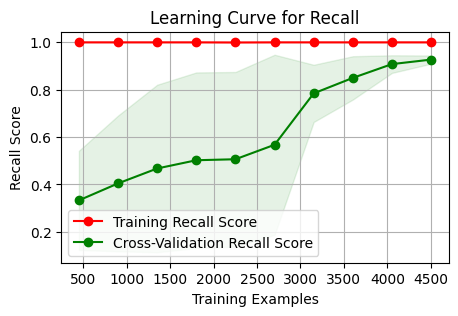

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, recall_score

def plot_learning_curve_recall(estimator, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes,
        scoring=make_scorer(recall_score, pos_label=1))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(5, 3))
    plt.title("Learning Curve for Recall")
    plt.xlabel("Training Examples")
    plt.ylabel("Recall Score")

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Recall Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Recall Score")

    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Gantilah model dengan rf_model, dan pastikan X, y, dan cv sudah terdefinisi sebelumnya
plot_learning_curve_recall(rf_model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))


Berdasarkan Learning Curve yang diamati, dapat disimpulkan bahwa model yang kami kembangkan telah mencapai titik di mana peningkatan performa tambahan atau kompleksitas model mungkin tidak lagi diperlukan. Learning Curve tersebut menunjukkan bahwa model cenderung stabil dan sudah mampu menggeneralisasi dengan baik terhadap data churn. Oleh karena itu, dapat dianggap bahwa model telah mencapai tingkat "best-fit", di mana peningkatan lebih lanjut dalam pelatihan mungkin tidak signifikan atau bahkan dapat menyebabkan overfitting.

Evaluasi metrics sebelumnya menunjukkan bahwa fokus kami pada recall bertujuan untuk mengurangi false negatives. Alasan pemilihan recall sebagai metrik evaluasi adalah untuk memantau peningkatan yang mungkin terjadi pada recall, dengan tujuan mengurangi jumlah false negatives. sebagai tambahan informasi kami melakukan Cross-Validation (F1 Score) untuk setiap lipatan:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Misalkan Anda memiliki model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Misalkan X_train dan y_train adalah data pelatihan dan labelnya
X_train, y_train = X_train, y_train
# Lakukan cross-validation dengan 5 lipatan
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1')

# Menampilkan hasil cross-validation
print("Hasil Cross-Validation (F1 Score) untuk setiap lipatan:")
print(cv_scores)
print("Rata-rata F1 Score: {:.2f}".format(cv_scores.mean()))

Hasil Cross-Validation (F1 Score) untuk setiap lipatan:
[0.77570093 0.77922078 0.80519481 0.80172414 0.83404255]
Rata-rata F1 Score: 0.80


**E. Hyperparameter Tuning**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Membuat daftar hyperparameter yang akan dijelajahi
n_estimators = [int(x) for x in np.linspace(start=10, stop=200, num=10)]
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

hyperparameters = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=1)

# Membuat objek RandomizedSearchCV
rs = RandomizedSearchCV(rf_model, hyperparameters, n_iter=50, scoring='roc_auc', random_state=1, cv=5)

# Melatih model pada data pelatihan
rs.fit(X_train, y_train)
# Evaluasi model dengan metrik ROC AUC atau metrik lain yang sesuai
eval_classification(rs)

F1-Score (Test Set): 0.88
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00


Secara keseluruhan, skor F1 yang tinggi dan ROC AUC yang tinggi pada data uji adalah tanda positif, menunjukkan bahwa model memiliki performa yang baik dalam mengidentifikasi pelanggan yang mungkin akan churn.




> **Check the best hyperparameter after tuning**



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Contoh dataset (gantilah dengan dataset sesuai kebutuhan Anda)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Model RandomForestClassifier
rf = RandomForestClassifier()

# Grid dari hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)

# Melakukan penyetelan hyperparameter
grid_search.fit(X, y)

# Mendapatkan parameter terbaik setelah tuning
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


Kombinasi hyperparameter ini dianggap sebagai kombinasi terbaik yang memberikan performa yang optimal pada metrik evaluasi yang dipilih (dalam hal ini, F1-Score). Penyetelan ini membantu model Random Forest untuk memberikan keseimbangan yang baik antara ketepatan dan recall, serta mencegah overfitting.

### **Feature Importance**

*   Evaluasi feature yang paling penting,
*   Tarik business insight-nya,
*   Berikan action items berupa rekomendasi terhadap insight tersebut








In [ ]:
# Memanggil df.columns untuk mendapatkan nama kolom
column_names = df.columns

# Menampilkan nama kolom
print(column_names)


Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Mobile Phone', 'Phone',
       'Credit Card', 'Debit Card', 'E wallet', 'UPI', 'Male', 'Grocery',
       'Laptop & Accessory', 'Mobile', 'Mobile Phone.1', 'Others', 'Married',
       'Single'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
feature_names = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Mobile Phone', 'Phone',
       'Credit Card', 'Debit Card', 'E wallet', 'UPI', 'Male', 'Grocery',
       'Laptop & Accessory', 'Mobile', 'Mobile Phone.1', 'Others', 'Married',
       'Single']

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Melatih model pada data pelatihan
rf_model.fit(X_train, y_train)

# Mendapatkan pentingnya fitur
feature_importance = rf_model.feature_importances_

# Menampilkan hasil pentingnya fitur dengan nama asli
for i, importance in enumerate(feature_importance):
    print(f"{feature_names[i]}: {importance}")


Tenure: 0.21318238153433128
CityTier: 0.02345794147325287
WarehouseToHome: 0.07510889839010793
HourSpendOnApp: 0.018830697907078538
NumberOfDeviceRegistered: 0.03542335276631062
SatisfactionScore: 0.047972876400420576
NumberOfAddress: 0.06520550262165742
Complain: 0.06436771315687942
OrderAmountHikeFromlastYear: 0.06004638787548579
CouponUsed: 0.029804650208006333
OrderCount: 0.03242632482480428
DaySinceLastOrder: 0.06625949159196125
CashbackAmount: 0.09371852429097088
Mobile Phone: 0.013349531347410369
Phone: 0.011392735651869325
Credit Card: 0.014908396985112536
Debit Card: 0.014537375330721268
E wallet: 0.010693560500885633
UPI: 0.005808553615861313
Male: 0.01717012351918907
Grocery: 0.0035958686152289844
Laptop & Accessory: 0.014679992294911695
Mobile: 0.009564247613052792
Mobile Phone.1: 0.015673496380101286
Others: 0.0018397700229792215
Married: 0.013128991447665436
Single: 0.027852613633744066


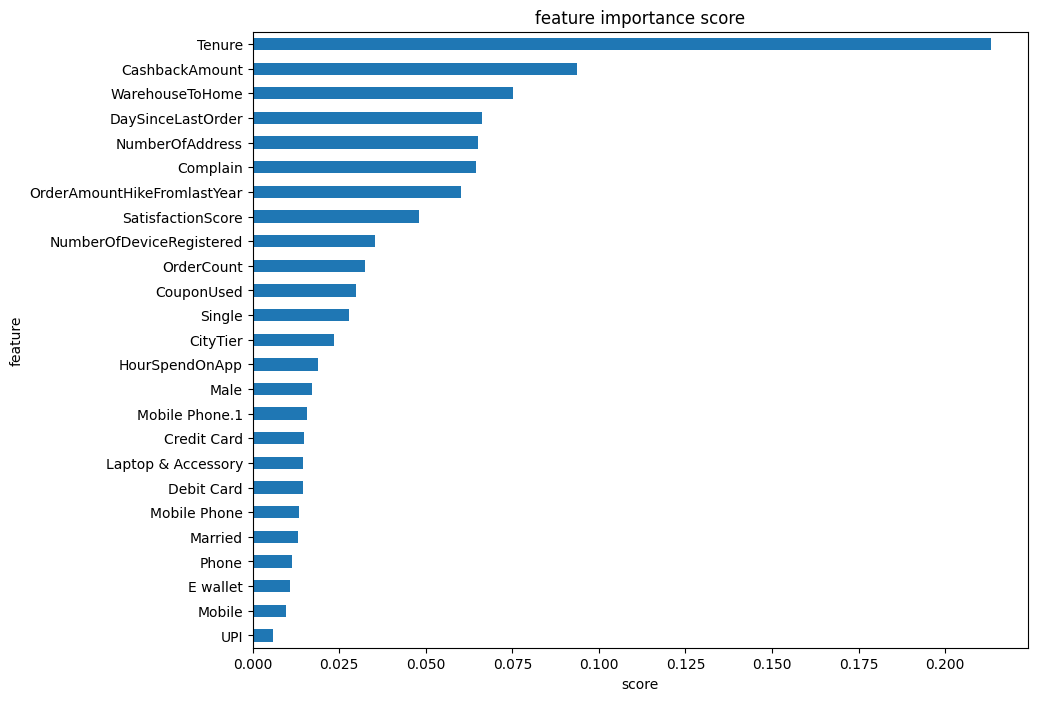

In [ ]:
def show_feature_importance(model, column_names, top_n=25):
    feat_importances = pd.Series(model.feature_importances_, index=column_names)
    ax = feat_importances.nlargest(top_n).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    plt.show()

# Menampilkan fitur penting dari model RandomForestClassifier
show_feature_importance(rf_model, feature_names)

In [ ]:
pip install shap

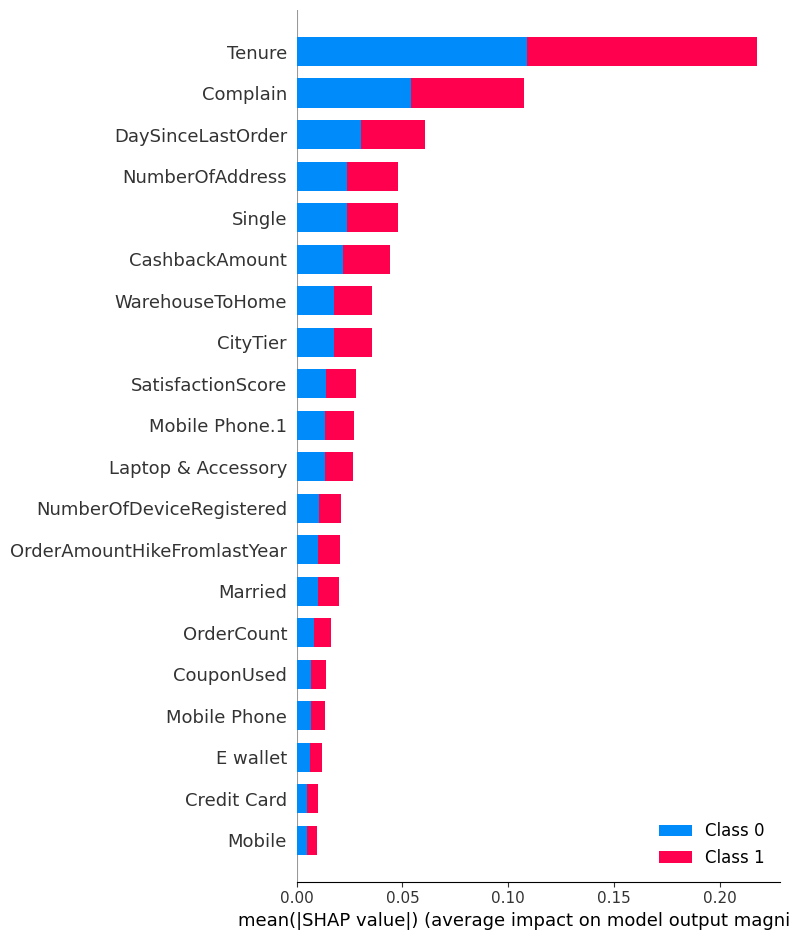

In [ ]:
import shap
import matplotlib.pyplot as plt

# Inisialisasi explainer dari SHAP menggunakan TreeExplainer
explainer = shap.TreeExplainer(rf_model)

# Hitung SHAP values untuk setiap observasi dalam X_train
shap_values = explainer.shap_values(X_train)

# Tampilkan ringkasan plot SHAP untuk semua fitur
shap.summary_plot(shap_values, X_train, feature_names=feature_names)

# Pilih satu observasi (gantilah dengan indeks yang sesuai)
sample_index = 0

# Tampilkan plot SHAP force untuk satu observasi
shap.force_plot(explainer.expected_value[1], shap_values[1][sample_index, :], X_train.iloc[sample_index, :], feature_names=feature_names)

# Menampilkan plot
plt.show()


**Business Insight:**

1. Feature Tenure memiliki pengaruh yang paling signifikan (0.2049): Ini menunjukkan bahwa Feature 2 adalah fitur yang paling penting dalam membuat prediksi. kita dapat melakukan Penekanan pada Retensi Pelanggan. Karena, jika tenure memiliki pengaruh yang tinggi, ini menunjukkan bahwa lamanya tinggal pelanggan dalam layanan Anda memiliki dampak besar pada keputusan pelanggan untuk bertahan atau pergi. Bisnis Anda mungkin ingin lebih memfokuskan upaya pada retensi pelanggan dengan mengidentifikasi pelanggan dengan tenure rendah dan mencoba untuk meningkatkan tingkat retensi mereka.

2. Feature CashbackAmount juga memiliki pengaruh yang signifikan (0.0905)Feature ini juga cukup penting dalam membuat prediksi.jika "cashback amount" berkontribusi besar dalam prediksi, E-commerce dapat mempertimbangkan untuk meningkatkan atau menyesuaikan program cashback untuk mendapatkan lebih banyak pelanggan atau mempertahankan pelanggan yang ada.

3. Feature DaySinceLastOrder dapat digunakan sebagai indikator penting dalam memprediksi perilaku pelanggan atau keputusan mereka untuk bertahan atau pergi. Informasi ini dapat membantu untuk memahami betapa pentingnya retensi pelanggan yang sering melakukan pemesanan dan merencanakan strategi retensi yang lebih efektif, seperti mengirimkan penawaran khusus kepada pelanggan dengan DaySinceLastOrder yang lebih lama atau memberikan insentif khusus untuk memicu pemesanan ulang.

4. Feature NumberOfAddress: Jumlah alamat yang dimiliki oleh pelanggan dapat menjadi faktor penting dalam memprediksi perilaku pelanggan atau keputusan mereka. Informasi ini dapat membantu untuk memahami bagaimana variasi jumlah alamat dapat memengaruhi retensi pelanggan serta sebagai kriteria untuk mengelompokkan pelanggan ke dalam kelompok yang berbeda. Pelanggan dengan jumlah alamat yang berbeda mungkin memiliki preferensi atau kebutuhan yang berbeda.

5. Feature Complain: kita dapat melakukan analisis lebih lanjut untuk memahami jenis keluhan apa yang paling umum dan apa yang paling memengaruhi keputusan pelanggan. Ini dapat membantu untuk mengidentifikasi hal-hal yang membutuhkan perbaikan. perusahaan dapat melakukan Pelatihan karyawan dalam menangani keluhan pelanggan dengan baik dan memberikan solusi yang memuaskan adalah faktor penting dalam mempertahankan pelanggan. Ini dapat membantu mengurangi tingkat keluhan dan meningkatkan retensi pelanggan.

**Action Items:**

1. Feature Tenure:
> - Identifikasi pelanggan dengan tenure yang rendah dan berikan insentif khusus untuk memperpanjang lamanya tinggal mereka.
  - Tawarkan program loyalitas atau keuntungan khusus kepada pelanggan yang telah setia selama periode yang lama.
  - Monitor dan evaluasi faktor-faktor yang mempengaruhi pelanggan dengan tenure rendah untuk mengidentifikasi cara meningkatkan retensi mereka.

2. Cashback Amount:
> - Evaluasi program cashback yang ada dan pertimbangkan untuk meningkatkan atau menyesuaikan insentif cashback untuk pelanggan.
  - Analisis dampak dari perubahan cashback terhadap retensi pelanggan dan ROI.
  - Berikan informasi yang jelas kepada pelanggan tentang program cashback dan manfaatnya untuk memotivasi mereka untuk tetap menggunakan layanan Anda.

3. Day Since Last Order (Lama Waktu Sejak Pesanan Terakhir):
> - Identifikasi pelanggan dengan lama waktu sejak pesanan terakhir yang tinggi dan kirimkan penawaran khusus atau insentif untuk mendorong pemesanan ulang.
  - Pantau tren lama waktu pesanan dan tindak lanjuti perubahan dalam perilaku pelanggan.
  - Pastikan bahwa layanan pelanggan atau dukungan tersedia untuk membantu pelanggan yang mungkin memiliki hambatan dalam melakukan pemesanan.

4. Number of Address (Jumlah Alamat):
> - Gunakan informasi ini untuk mengkategorikan pelanggan ke dalam kelompok berdasarkan jumlah alamat mereka dan pertimbangkan strategi yang berbeda untuk setiap kelompok.
  - Analisis apakah jumlah alamat memengaruhi kebutuhan atau preferensi pelanggan, dan sesuaikan tawaran produk atau layanan sesuai dengan kelompok pelanggan.

5. Complain (Keluhan):


> - Lakukan analisis lebih mendalam tentang jenis keluhan yang paling umum dan penyebab utama keluhan pelanggan.
  - Tingkatkan pelatihan karyawan dalam menangani keluhan dan memberikan solusi yang memuaskan.
  - Evaluasi kebijakan dan prosedur pengelolaan keluhan Anda dan pastikan mereka efektif dalam mengurangi keluhan.

